In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [96]:
df = pd.read_csv('data\stud.csv')

In [97]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [99]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [100]:
df.duplicated().sum()

0

In [101]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [102]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [103]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [104]:
categorical_features = [feature for feature in df.columns if  df[feature].dtype=='O']
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']

In [105]:
print(f"we have numeric feature {len(numerical_features)}")
print(f"we have {len(categorical_features)} categorical feaetures")

we have numeric feature 3
we have 5 categorical feaetures


In [106]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3

In [107]:
df.head(4)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333


In [108]:
math_full = df[df['math_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
reading_full = df[df['reading_score'] == 100]['average'].count()

print(f"The students who have full marks in math are {math_full}")
print(f"The students who have full marks in writing are {writing_full}")
print(f"The students who have full marks in reading are {writing_full}")

The students who have full marks in math are 7
The students who have full marks in writing are 14
The students who have full marks in reading are 14


In [109]:
math_score = df[df['math_score'] <= 20]['average'].count()
writing_score = df[df['writing_score'] <= 20]['average'].count()
reading_score = df[df['reading_score'] <= 20]['average'].count()

print(f"The students who have less than 20 marks in math are {math_score}")
print(f"The students who have less than 20 full marks in writing are {writing_score}")
print(f"The students who have less than 20 full marks in reading are {writing_score}")

The students who have less than 20 marks in math are 4
The students who have less than 20 full marks in writing are 3
The students who have less than 20 full marks in reading are 3


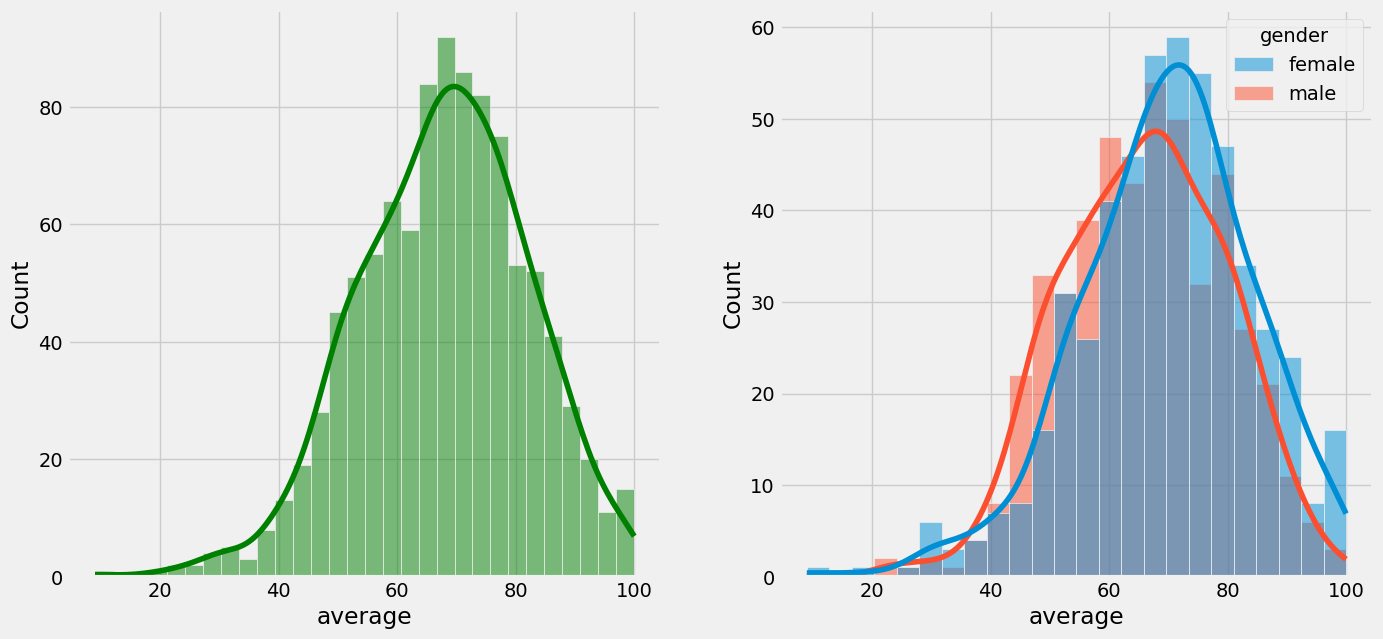

In [110]:
import seaborn as sns
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data = df, x = 'average', bins = 30, color = 'green', kde = True)
plt.subplot(122)
sns.histplot(data = df, x = 'average', kde = True, hue = 'gender')
plt.show()


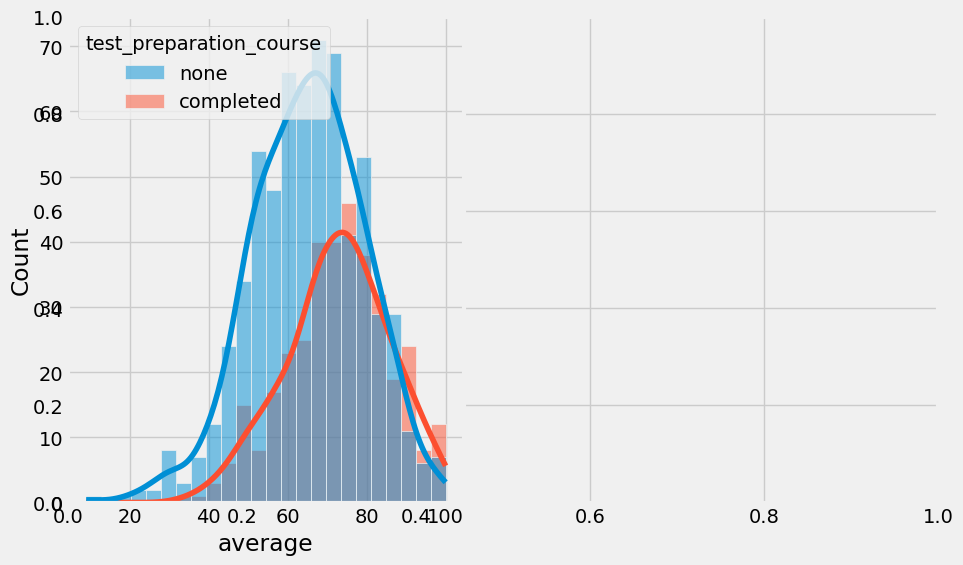

In [111]:
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
plt.subplot(121)
sns.histplot(data = df, x = 'average', kde = True, hue = 'test_preparation_course')
plt.show()

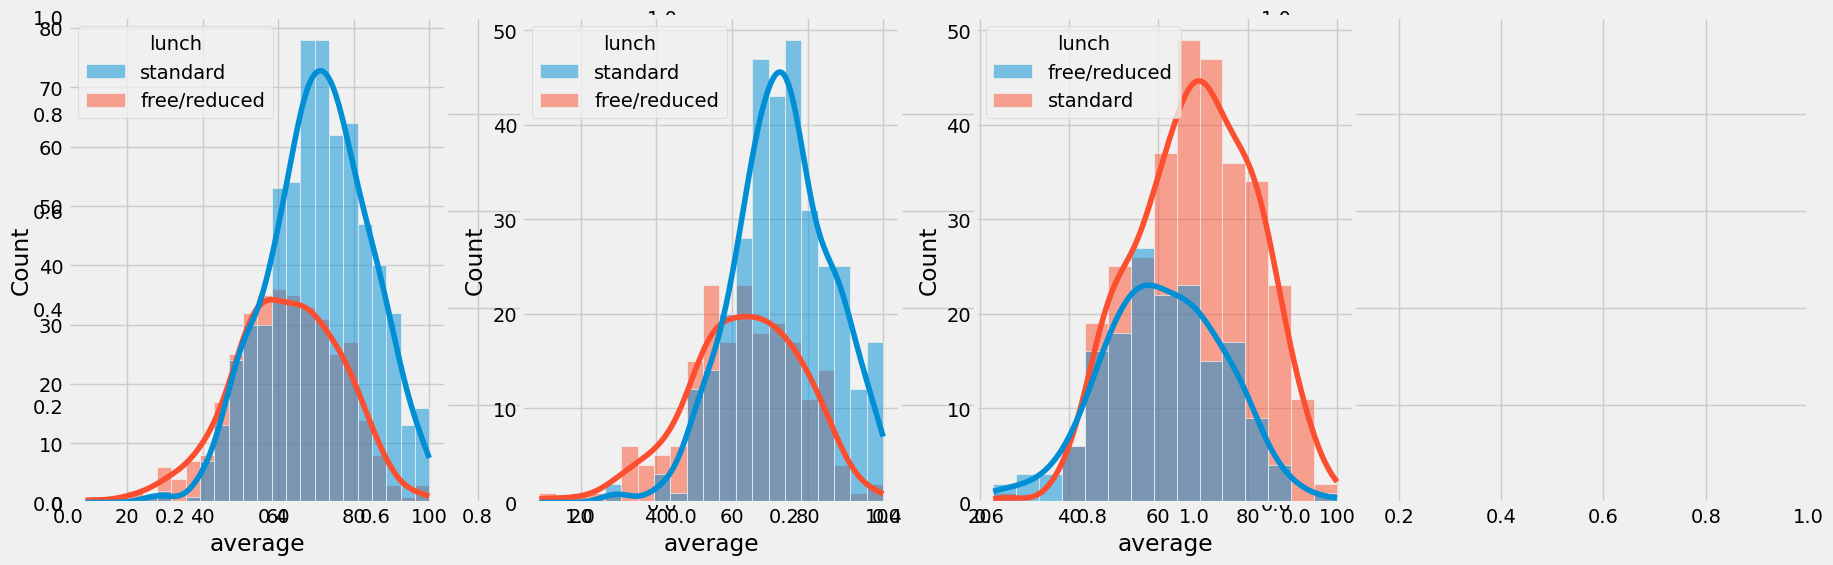

In [112]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
plt.subplot(141)
sns.histplot(data = df, x = 'average', kde = True, hue = 'lunch')
plt.subplot(142)
sns.histplot(data = df[df.gender =='female'], x = 'average', kde = True, hue = 'lunch')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'], x = 'average', kde = True, hue = 'lunch')
plt.show()

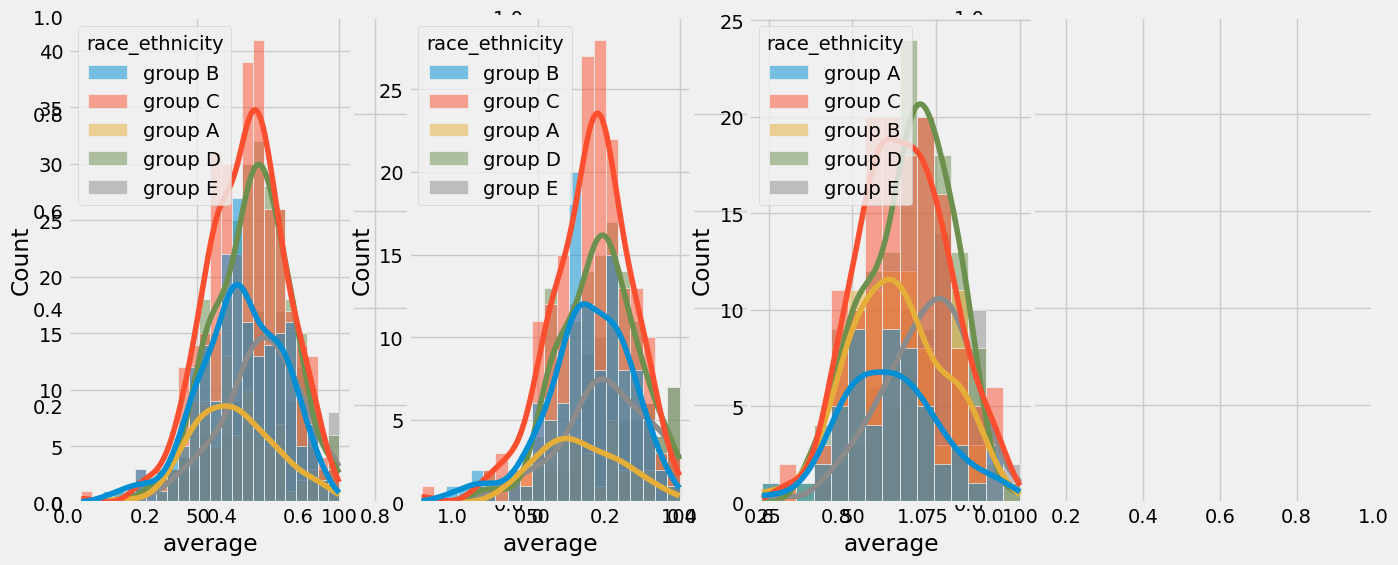

In [113]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
plt.subplot(141)
sns.histplot(data = df, x = 'average', kde = True, hue = 'race_ethnicity')
plt.subplot(142)
sns.histplot(data = df[df.gender =='female'], x = 'average', kde = True, hue = 'race_ethnicity')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'], x = 'average', kde = True, hue = 'race_ethnicity')
plt.show()

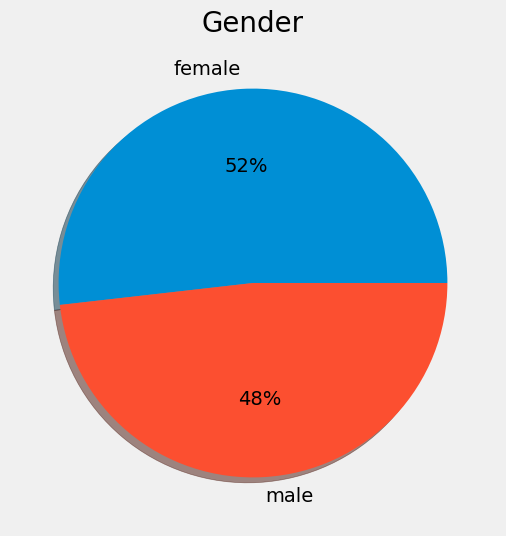

In [114]:
plt.rcParams['figure.figsize'] = (6, 6)

size = df['gender'].value_counts()
labels = ['female', 'male']
plt.pie(size, labels = labels, autopct='%1.0f%%', shadow = True)
plt.title('Gender', fontsize = 20)
plt.show()

In [115]:
df['race_ethnicity'].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

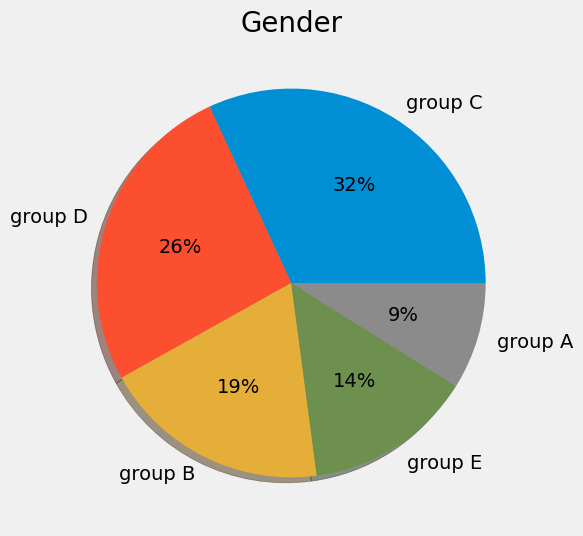

In [116]:
plt.rcParams['figure.figsize'] = (6, 6)

size = df['race_ethnicity'].value_counts()
lst = ['group C', 'group D', 'group B', 'group E', 'group A']
plt.pie(size, labels = lst, autopct='%1.0f%%', shadow = True)
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.show()

In [117]:
df['parental_level_of_education'].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

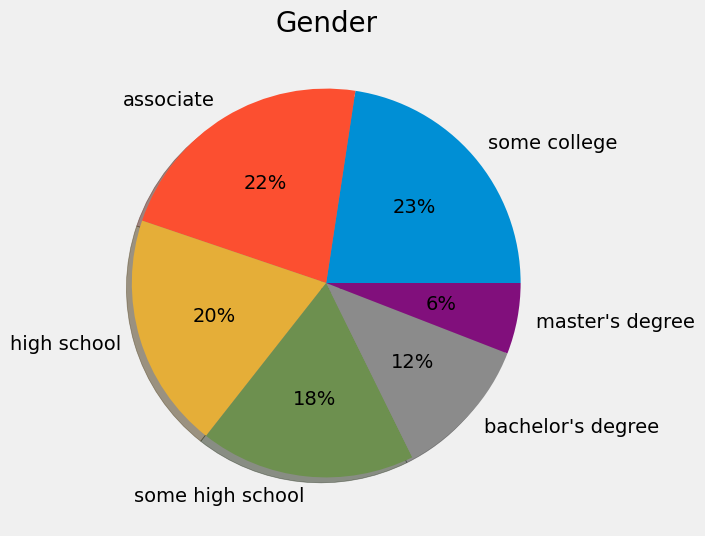

In [118]:
plt.rcParams['figure.figsize'] = (6, 6)

size = df['parental_level_of_education'].value_counts()
lst = ['some college', 'associate', 'high school', 'some high school', "bachelor's degree", "master's degree"]
plt.pie(size, labels = lst,  autopct='%1.0f%%',shadow=True)
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.show()

In [119]:
gender_group = df.groupby('gender')['average'].mean()

math_group = df.groupby('gender')['math_score'].mean()

In [120]:
math_group

gender
female    63.633205
male      68.728216
Name: math_score, dtype: float64

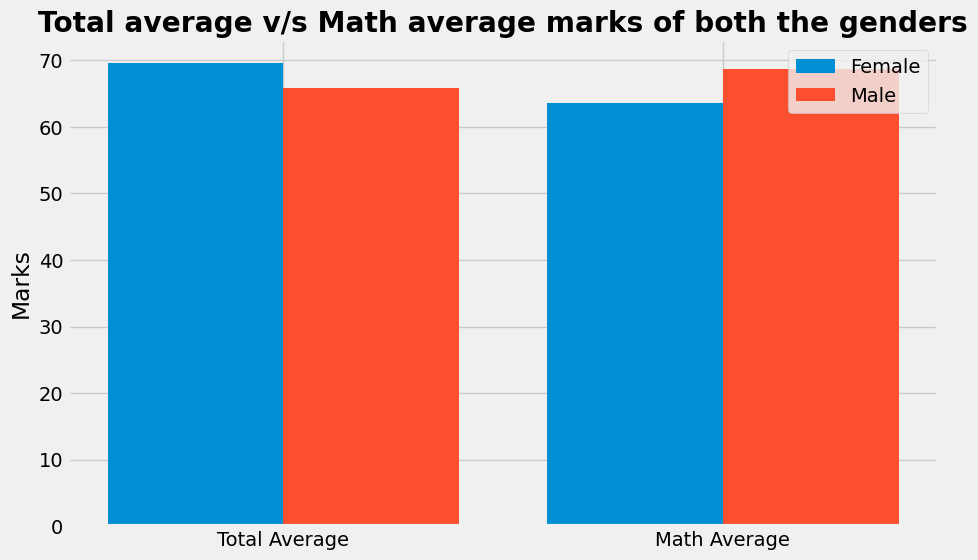

In [121]:
plt.figure(figsize=(10, 6))
X = ['Total Average', 'Math Average']

female = [gender_group[0], math_group[0]]
male = [gender_group[1], math_group[1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2,female, 0.4, label =  'Female' )
plt.bar(X_axis + 0.2,male, 0.4, label = 'Male' )

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Comparison of Parental Education')

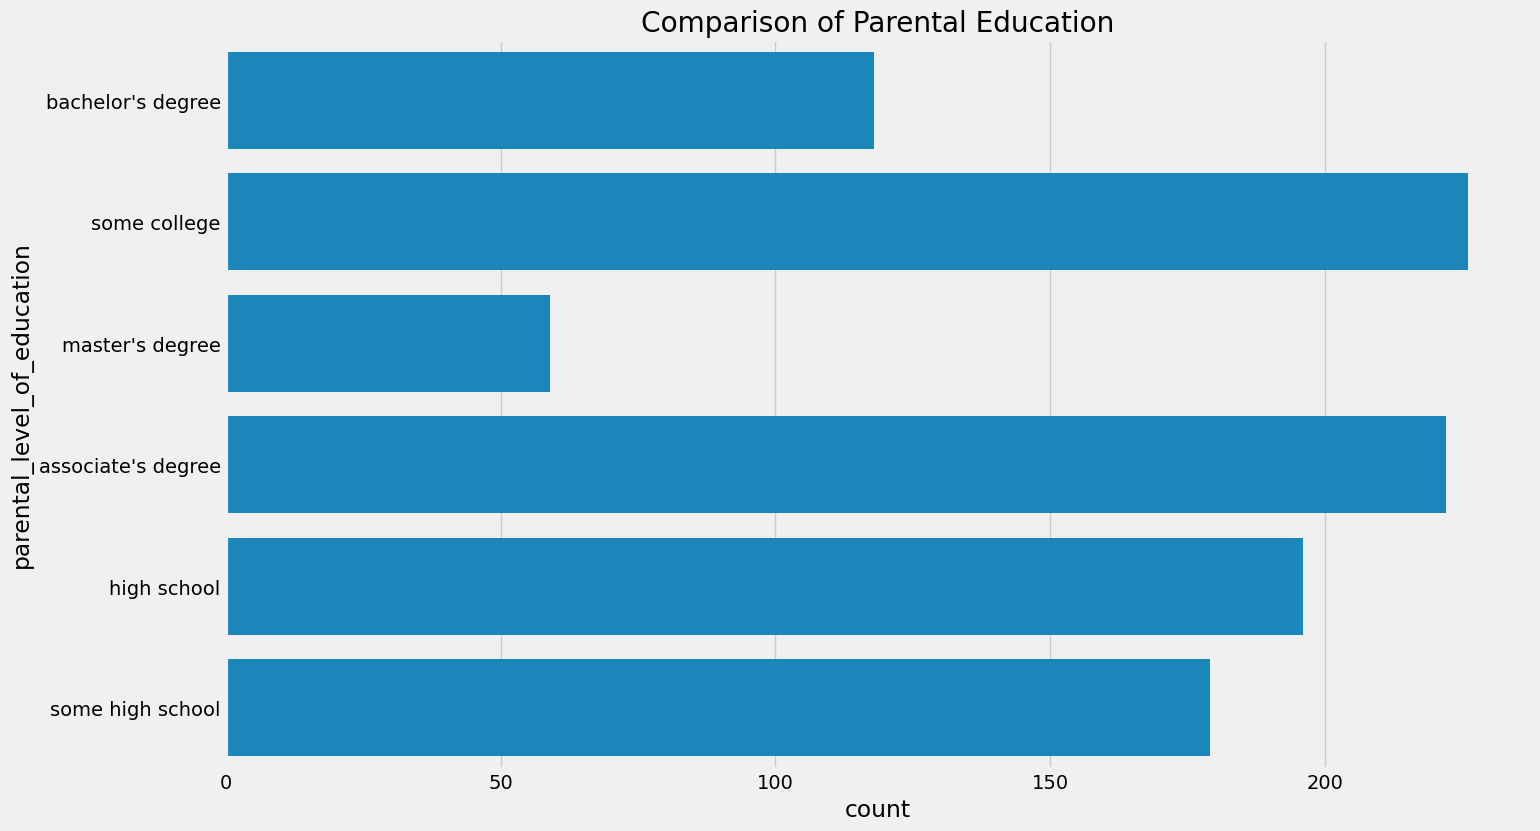

In [122]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(data = df['parental_level_of_education'])
plt.title('Comparison of Parental Education')

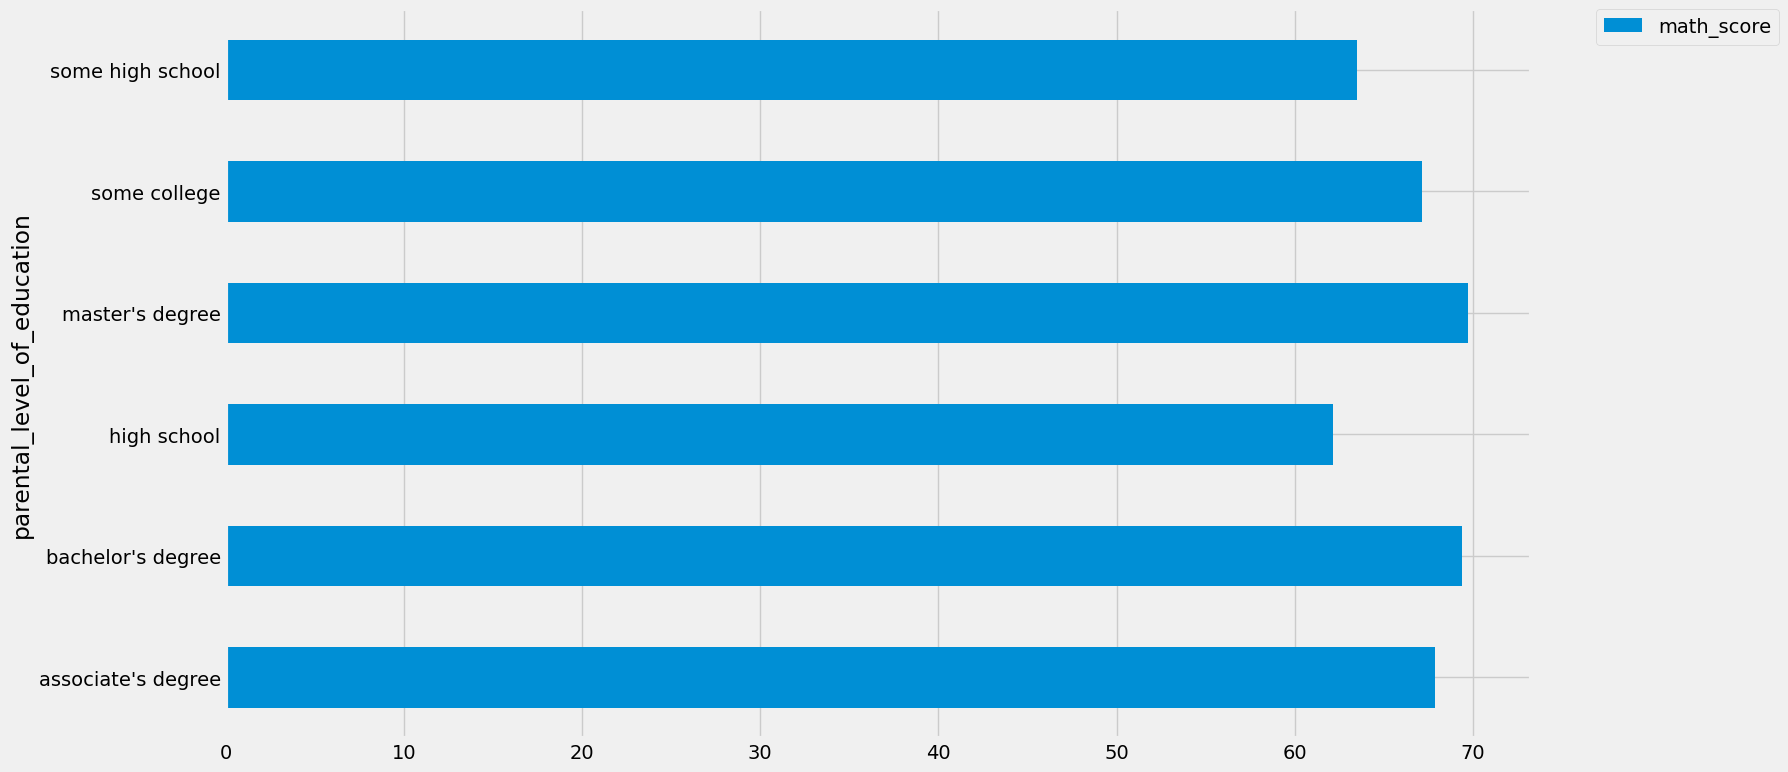

In [123]:
df.groupby('parental_level_of_education')['math_score'].agg('mean').plot(kind = 'barh')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

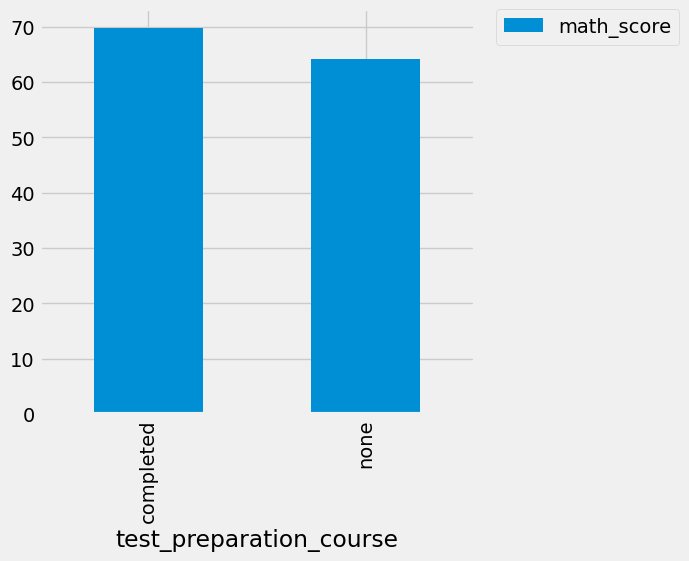

In [124]:
df.groupby('test_preparation_course')['math_score'].agg('mean').plot(kind='bar',figsize=(5,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

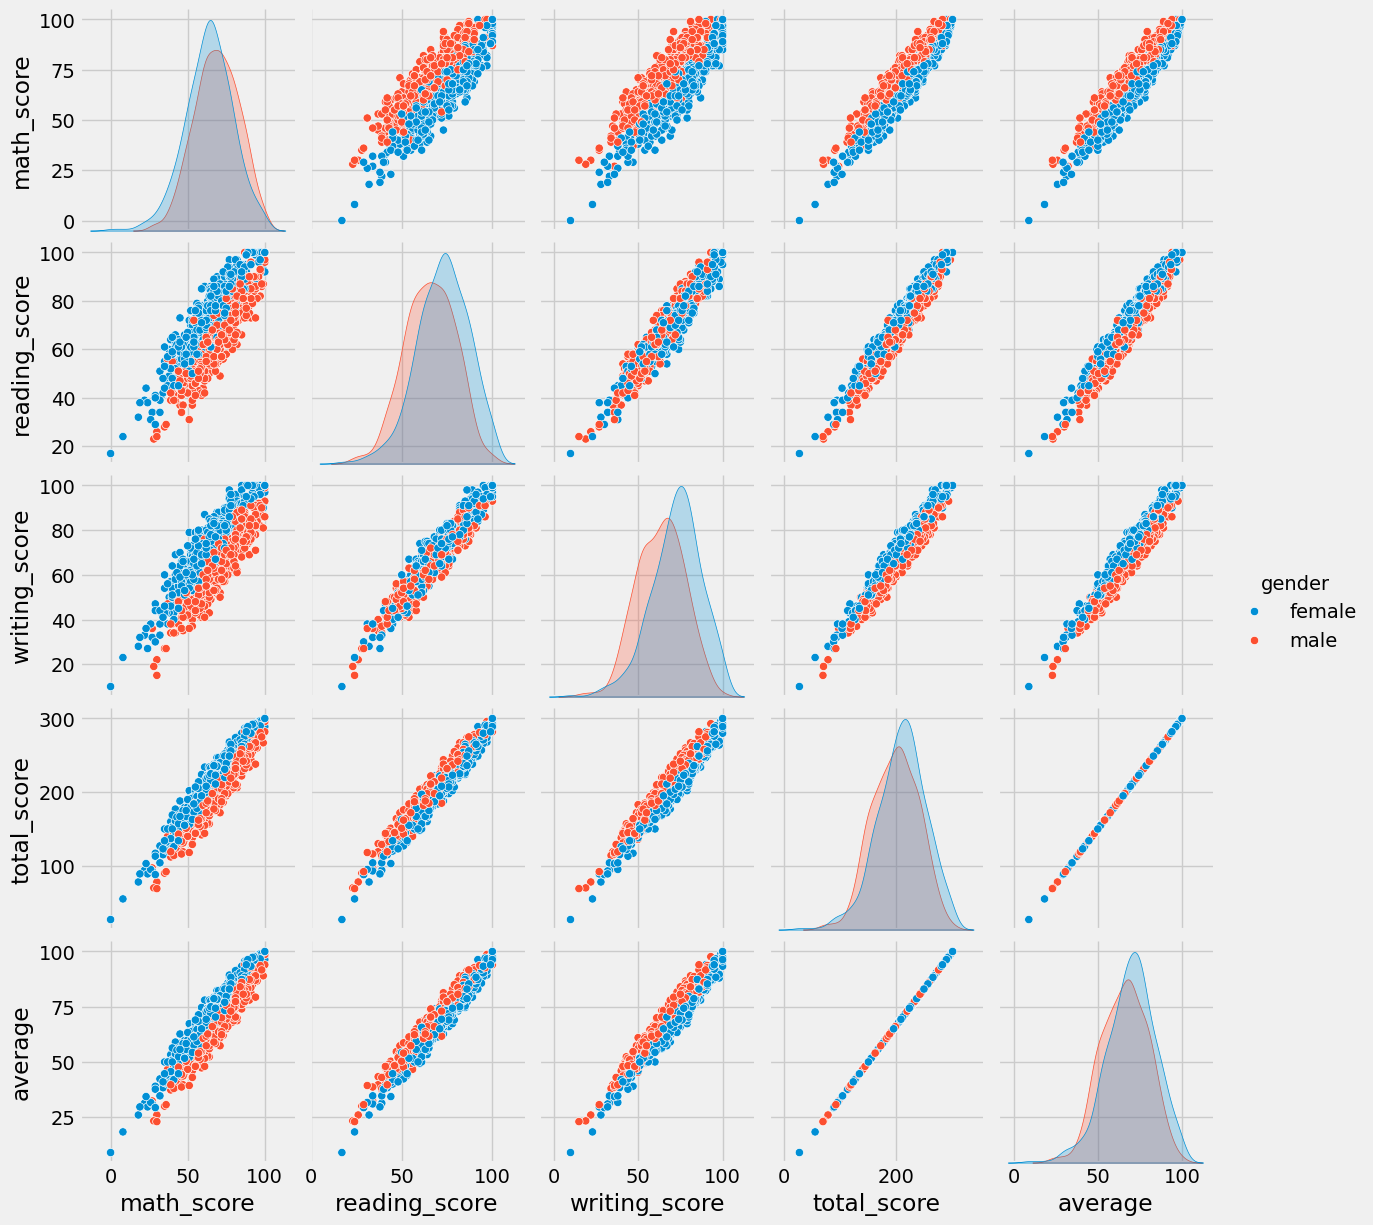

In [125]:
sns.pairplot(df,hue = 'gender')
plt.show()